In [1]:
import geopandas
import pandas as pd
# import re,datefinder,datetime,pandas as pd,warnings, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from shapely.geometry import Point, Polygon

def dataSummary(df):
    display(pd.merge(df.describe(include='all').T, pd.merge(pd.DataFrame(df.isnull().sum(), columns=['Null Sum']),
                                          pd.DataFrame(df.isnull().mean(), columns=['Null Percentage']), how='left',
                                          left_index=True, right_index=True), how='left', left_index=True,
             right_index=True).sort_values(by='count'))

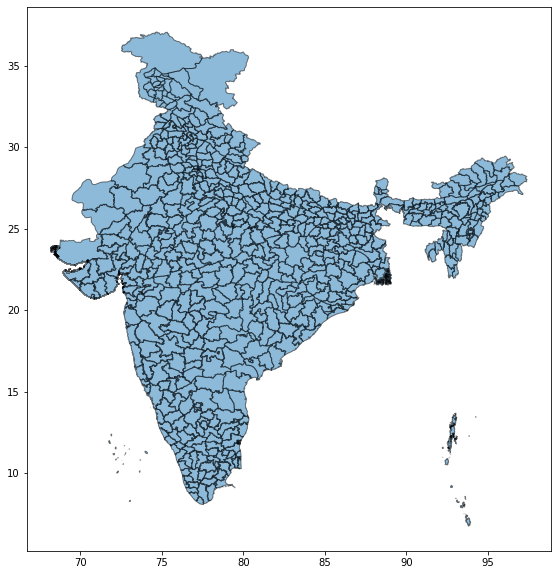

In [2]:
gdf=geopandas.read_file('./India Districts/IndiaDistricts_2011.shp')
gdf.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

---------

In [3]:
ebird=pd.read_csv('ebird_v3.0.csv', index_col=0)
ebird['OBSERVATION DATE']=pd.to_datetime(ebird['OBSERVATION DATE'], format='%Y-%m-%d')
ebird['MonthFirstDay']=pd.to_datetime(ebird['MonthFirstDay'])

In [4]:
ebird.columns

Index(['COMMON NAME', 'STATE', 'OBSERVATION_FREQUENCY', 'LOCALITY', 'LATITUDE',
       'LONGITUDE', 'TIME OBSERVATIONS STARTED', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'COUNTY', 'OBSERVATION DATE', 'PROTOCOL TYPE',
       'OBSERVATION COUNT', 'MonthFirstDay', 'Year', 'weekday', 'Season',
       'TOS_H', 'session', 'uniqueGEO', 'District', 'DistrictFlag'],
      dtype='object')

In [5]:
dataSummary(ebird)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,Null Sum,Null Percentage
OBSERVATION_FREQUENCY,329904.0,NaN,NaN,NaN,NaT,NaT,0.987836,0.109618,0.0,1.0,1.0,1.0,1.0,307560,0.482474
COUNTY,635548,105,Bangalore,71310,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1916,0.003006
TIME OBSERVATIONS STARTED,636494,1165,07:00:00,19443,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,970,0.001522
COMMON NAME,637464,15,Black Drongo,140310,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
uniqueGEO,637464,51570,77.571330113.0857318,9173,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
session,637464,7,Early Morning,310072,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
TOS_H,637464,48,07,122310,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
Season,637464,4,winter,301099,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
weekday,637464,7,Sunday,162833,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
Year,637464.0,NaN,NaN,NaN,NaT,NaT,2018.084916,1.529216,2015.0,2017.0,2018.0,2019.0,2020.0,0,0.000000


In [6]:
len(ebird[ebird['DistrictFlag']==True])

625375

In [7]:
len(ebird[ebird['DistrictFlag']==False])

12089

In [8]:
ebird[(ebird['DistrictFlag']==False)&(ebird['District']=='Not Found')][['COUNTY','District','LONGITUDE','LATITUDE']].drop_duplicates()

,COUNTY,District,LONGITUDE,LATITUDE
55,North Goa,Not Found,73.745234,15.628425
175,Thrissur,Not Found,76.007633,10.572015
223,Ernakulam,Not Found,76.216069,10.010760
484,Pudukkottai,Not Found,79.265957,10.037860
834,Ernakulam,Not Found,76.226492,9.982207
...,...,...,...,...
606928,Udupi,Not Found,74.693705,13.661312
610365,Alappuzha,Not Found,76.381954,9.309060
611118,Udupi,Not Found,74.698105,13.348546
621974,East Godavari,Not Found,82.143982,16.501584


### Number of County's

In [9]:
ebird['COUNTY'].unique().size

106

### Number of Unique GEO locations in Dataset

In [10]:
ebird['uniqueGEO'].unique().size

51570

### Number of Locality's

In [11]:
ebird['LOCALITY'].unique().size

47623

### Number of records With Duration Minutes is Zero

In [12]:
len(ebird[ebird['DURATION MINUTES']==0])

1101

In [13]:
str(round((len(ebird[ebird['DURATION MINUTES']==0])/len(ebird))*100,2))+'%'

'0.17%'

### Number of records With Effort Distance KM is Zero

In [14]:
len(ebird[ebird['EFFORT DISTANCE KM']==0])

180933

In [15]:
str(round((len(ebird[ebird['EFFORT DISTANCE KM']==0])/len(ebird))*100,2))+'%'

'28.38%'

----

In [16]:
ebird_byMonth=pd.read_csv('ebird_byMonth.csv', index_col=0)
ebird_byMonth['Month']=pd.to_datetime(ebird_byMonth['Month'], format='%Y-%m-%d')
ebird_byMonth.sort_values(['county','common_name','Month'],inplace=True)

In [17]:
ebird_byMonth.head(2)

,No_Unique_LOCALITY In County,Number of Observations,Month,common_name,county,EFFORT DISTANCE KM,OBSERVATION COUNT,DURATION MINUTES,PROTOCOL_TYPE_Stationary,PROTOCOL_TYPE_Historical,...,session_Night,Season_summer,Season_autumn,Season_spring,Season_winter,LastBirdObservarionByMonth,LastBirdObservarionByDays,FoundInONESession,FoundInTWOSession,FoundMoreThanTWOSession
0,2,5,2017-01-01,Ashy Drongo,Adilabad,150,25,0,0,5,...,0,0,0,0,5,0.0,0,False,False,False
1,1,1,2019-03-01,Ashy Drongo,Adilabad,2,1,120,0,0,...,0,0,0,0,1,26.3,789,True,False,False


#### Birds found by Season

In [18]:
ebird_bySeason=pd.DataFrame(columns=['common_name','Season_summer','Season_autumn','Season_spring','Season_winter','Season_summer%','Season_autumn%','Season_spring%','Season_winter%','total'])
count=0;
for index, row in ebird_byMonth.groupby('common_name'):
    total=sum(row['Season_summer'])+sum(row['Season_autumn'])+sum(row['Season_spring'])+sum(row['Season_winter'])#+sum(row['Friday'])+sum(row['Saturday'])+sum(row['Sunday'])
    ebird_bySeason.loc[count] = [index,sum(row['Season_summer']),sum(row['Season_autumn']),sum(row['Season_spring']),sum(row['Season_winter']),str(float("{:.2f}".format((sum(row['Season_summer'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Season_autumn'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Season_spring'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Season_winter'])/total)*100)))+'%',total]
    count=count+1
ebird_bySeason

,common_name,Season_summer,Season_autumn,Season_spring,Season_winter,Season_summer%,Season_autumn%,Season_spring%,Season_winter%,total
0,Ashy Drongo,158,8260,1898,19752,0.53%,27.47%,6.31%,65.69%,30068
1,Bay-backed Shrike,649,3240,660,3550,8.01%,40.0%,8.15%,43.83%,8099
2,Baya Weaver,5974,4579,2947,3958,34.22%,26.23%,16.88%,22.67%,17458
3,Black Drongo,27550,28865,23049,60708,19.65%,20.59%,16.44%,43.31%,140172
4,Blyth's Reed Warbler,151,11302,5753,46802,0.24%,17.66%,8.99%,73.12%,64008
5,Booted Eagle,27,2368,190,4918,0.36%,31.56%,2.53%,65.55%,7503
6,Brown Shrike,85,8445,1615,11434,0.39%,39.14%,7.48%,52.99%,21579
7,Chestnut-tailed Starling,32,3270,684,9100,0.24%,24.99%,5.23%,69.54%,13086
8,Greater Coucal,31602,22606,25089,44924,25.44%,18.2%,20.2%,36.16%,124221
9,Greenish Warbler,415,7386,1493,15407,1.68%,29.9%,6.04%,62.37%,24701


#### Birds Found By Weekday

In [19]:
ebird_byWeekDay=pd.DataFrame(columns=['common_name','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday%','Tuesday%','Wednesday%','Thursday%','Friday%','Saturday%','Sunday%','total'])
count=0;
for index, row in ebird_byMonth.groupby('common_name'):
    total=sum(row['Monday'])+sum(row['Tuesday'])+sum(row['Wednesday'])+sum(row['Thursday'])+sum(row['Friday'])+sum(row['Saturday'])+sum(row['Sunday'])
    ebird_byWeekDay.loc[count] = [index,sum(row['Monday']),sum(row['Tuesday']),sum(row['Wednesday']),sum(row['Thursday']),sum(row['Friday']),sum(row['Saturday']),sum(row['Sunday']),str(float("{:.2f}".format((sum(row['Monday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Tuesday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Wednesday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Thursday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Friday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Saturday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Sunday'])/total)*100)))+'%',total]
    count=count+1
ebird_byWeekDay

,common_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday%,Tuesday%,Wednesday%,Thursday%,Friday%,Saturday%,Sunday%,total
0,Ashy Drongo,3192,2828,2767,3097,4432,6224,7528,10.62%,9.41%,9.2%,10.3%,14.74%,20.7%,25.04%,30068
1,Bay-backed Shrike,792,656,607,652,818,2002,2572,9.78%,8.1%,7.49%,8.05%,10.1%,24.72%,31.76%,8099
2,Baya Weaver,1707,1579,1626,1520,2096,3656,5274,9.78%,9.04%,9.31%,8.71%,12.01%,20.94%,30.21%,17458
3,Black Drongo,16229,13954,14275,14152,19276,27987,34299,11.58%,9.95%,10.18%,10.1%,13.75%,19.97%,24.47%,140172
4,Blyth's Reed Warbler,6946,6178,6155,6653,8674,13089,16313,10.85%,9.65%,9.62%,10.39%,13.55%,20.45%,25.49%,64008
5,Booted Eagle,668,647,670,612,747,1647,2512,8.9%,8.62%,8.93%,8.16%,9.96%,21.95%,33.48%,7503
6,Brown Shrike,2034,1993,1966,2037,2504,4445,6600,9.43%,9.24%,9.11%,9.44%,11.6%,20.6%,30.59%,21579
7,Chestnut-tailed Starling,1501,1190,1116,1228,1552,2604,3895,11.47%,9.09%,8.53%,9.38%,11.86%,19.9%,29.76%,13086
8,Greater Coucal,13814,13500,13279,13178,15987,24650,29813,11.12%,10.87%,10.69%,10.61%,12.87%,19.84%,24.0%,124221
9,Greenish Warbler,2339,2229,2238,2627,3653,5152,6463,9.47%,9.02%,9.06%,10.64%,14.79%,20.86%,26.16%,24701


#### Birds(By Month ) Found By Weekday

In [20]:
ebird_byMonth_byWeekDay=pd.DataFrame(columns=['common_name','Month','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday%','Tuesday%','Wednesday%','Thursday%','Friday%','Saturday%','Sunday%','total'])
count=0;
for index1,row1 in ebird_byMonth.groupby('common_name'):
    for index, row in row1.groupby('Month'):
        total=sum(row['Monday'])+sum(row['Tuesday'])+sum(row['Wednesday'])+sum(row['Thursday'])+sum(row['Friday'])+sum(row['Saturday'])+sum(row['Sunday'])
        ebird_byMonth_byWeekDay.loc[count] = [index1,index,sum(row['Monday']),sum(row['Tuesday']),sum(row['Wednesday']),sum(row['Thursday']),sum(row['Friday']),sum(row['Saturday']),sum(row['Sunday']),str(float("{:.2f}".format((sum(row['Monday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Tuesday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Wednesday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Thursday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Friday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Saturday'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['Sunday'])/total)*100)))+'%',total]
        count=count+1
ebird_byMonth_byWeekDay

,common_name,Month,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday%,Tuesday%,Wednesday%,Thursday%,Friday%,Saturday%,Sunday%,total
0,Ashy Drongo,2015-01-01,23,21,22,33,27,48,43,10.6%,9.68%,10.14%,15.21%,12.44%,22.12%,19.82%,217
1,Ashy Drongo,2015-02-01,75,17,16,16,93,135,168,14.42%,3.27%,3.08%,3.08%,17.88%,25.96%,32.31%,520
2,Ashy Drongo,2015-03-01,25,28,18,31,24,29,114,9.29%,10.41%,6.69%,11.52%,8.92%,10.78%,42.38%,269
3,Ashy Drongo,2015-04-01,7,6,14,4,15,6,27,8.86%,7.59%,17.72%,5.06%,18.99%,7.59%,34.18%,79
4,Ashy Drongo,2015-05-01,1,2,0,0,0,0,0,33.33%,66.67%,0.0%,0.0%,0.0%,0.0%,0.0%,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,Tree Pipit,2020-02-01,0,3,4,3,2,19,8,0.0%,7.69%,10.26%,7.69%,5.13%,48.72%,20.51%,39
938,Tree Pipit,2020-03-01,5,1,4,2,5,3,4,20.83%,4.17%,16.67%,8.33%,20.83%,12.5%,16.67%,24
939,Tree Pipit,2020-04-01,1,0,0,2,0,0,0,33.33%,0.0%,0.0%,66.67%,0.0%,0.0%,0.0%,3
940,Tree Pipit,2020-09-01,0,0,1,1,2,0,1,0.0%,0.0%,20.0%,20.0%,40.0%,0.0%,20.0%,5


#### Birds found by Session in a Day

In [21]:
ebird_bySession=pd.DataFrame(columns=['common_name','session_Morning','session_Noon','session_Eve','session_Early_Morning','session__No_Data','session_Late_Night','session_Night','session_Morning%','session_Noon%','session_Eve%','session_Early_Morning%','session__No_Data%','session_Late_Night%','session_Night%','total'])
count=0;
for index, row in ebird_byMonth.groupby('common_name'):
    total=sum(row['session_Morning'])+sum(row['session_Noon'])+sum(row['session_Eve'])+sum(row['session_Early_Morning'])+sum(row['session__No_Data'])+sum(row['session_Late_Night'])+sum(row['session_Night'])
    ebird_bySession.loc[count] = [index,sum(row['session_Morning']),sum(row['session_Noon']),sum(row['session_Eve']),sum(row['session_Early_Morning']),sum(row['session__No_Data']),sum(row['session_Late_Night']),sum(row['session_Night']),str(float("{:.2f}".format((sum(row['session_Morning'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Noon'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Eve'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Early_Morning'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session__No_Data'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Late_Night'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Night'])/total)*100)))+'%',total]
    count=count+1
ebird_bySession

,common_name,session_Morning,session_Noon,session_Eve,session_Early_Morning,session__No_Data,session_Late_Night,session_Night,session_Morning%,session_Noon%,session_Eve%,session_Early_Morning%,session__No_Data%,session_Late_Night%,session_Night%,total
0,Ashy Drongo,5967,5368,3577,15040,86,16,14,19.85%,17.85%,11.9%,50.02%,0.29%,0.05%,0.05%,30068
1,Bay-backed Shrike,1697,1723,602,4019,49,4,5,20.95%,21.27%,7.43%,49.62%,0.61%,0.05%,0.06%,8099
2,Baya Weaver,3006,3553,2374,8470,43,5,7,17.22%,20.35%,13.6%,48.52%,0.25%,0.03%,0.04%,17458
3,Black Drongo,27440,26598,25445,60319,122,178,70,19.58%,18.98%,18.15%,43.03%,0.09%,0.13%,0.05%,140172
4,Blyth's Reed Warbler,13348,10583,8089,31879,82,20,7,20.85%,16.53%,12.64%,49.8%,0.13%,0.03%,0.01%,64008
5,Booted Eagle,2546,1789,375,2756,24,11,2,33.93%,23.84%,5.0%,36.73%,0.32%,0.15%,0.03%,7503
6,Brown Shrike,3813,3838,2520,11340,60,3,5,17.67%,17.79%,11.68%,52.55%,0.28%,0.01%,0.02%,21579
7,Chestnut-tailed Starling,1621,2208,1584,7612,42,13,6,12.39%,16.87%,12.1%,58.17%,0.32%,0.1%,0.05%,13086
8,Greater Coucal,22288,19568,19431,62650,125,120,39,17.94%,15.75%,15.64%,50.43%,0.1%,0.1%,0.03%,124221
9,Greenish Warbler,6467,4373,1565,12199,76,16,5,26.18%,17.7%,6.34%,49.39%,0.31%,0.06%,0.02%,24701


### Birds(By Month ) Found by Session in a Day

In [22]:
ebird_byMonth_bySession=pd.DataFrame(columns=['common_name','Month','session_Morning','session_Noon','session_Eve','session_Early_Morning','session__No_Data','session_Late_Night','session_Night','session_Morning%','session_Noon%','session_Eve%','session_Early_Morning%','session__No_Data%','session_Late_Night%','session_Night%','total'])
count=0;
for index1,row1 in ebird_byMonth.groupby('common_name'):
    for index, row in row1.groupby('Month'):
        total=sum(row['session_Morning'])+sum(row['session_Noon'])+sum(row['session_Eve'])+sum(row['session_Early_Morning'])+sum(row['session__No_Data'])+sum(row['session_Late_Night'])+sum(row['session_Night'])
        ebird_byMonth_bySession.loc[count] = [index1,index,sum(row['session_Morning']),sum(row['session_Noon']),sum(row['session_Eve']),sum(row['session_Early_Morning']),sum(row['session__No_Data']),sum(row['session_Late_Night']),sum(row['session_Night']),str(float("{:.2f}".format((sum(row['session_Morning'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Noon'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Eve'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Early_Morning'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session__No_Data'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Late_Night'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['session_Night'])/total)*100)))+'%',total]
        count=count+1
ebird_byMonth_bySession

,common_name,Month,session_Morning,session_Noon,session_Eve,session_Early_Morning,session__No_Data,session_Late_Night,session_Night,session_Morning%,session_Noon%,session_Eve%,session_Early_Morning%,session__No_Data%,session_Late_Night%,session_Night%,total
0,Ashy Drongo,2015-01-01,47,35,21,113,1,0,0,21.66%,16.13%,9.68%,52.07%,0.46%,0.0%,0.0%,217
1,Ashy Drongo,2015-02-01,84,41,101,293,1,0,0,16.15%,7.88%,19.42%,56.35%,0.19%,0.0%,0.0%,520
2,Ashy Drongo,2015-03-01,41,34,41,152,0,1,0,15.24%,12.64%,15.24%,56.51%,0.0%,0.37%,0.0%,269
3,Ashy Drongo,2015-04-01,4,7,17,50,1,0,0,5.06%,8.86%,21.52%,63.29%,1.27%,0.0%,0.0%,79
4,Ashy Drongo,2015-05-01,0,1,0,2,0,0,0,0.0%,33.33%,0.0%,66.67%,0.0%,0.0%,0.0%,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,Tree Pipit,2020-02-01,2,17,1,19,0,0,0,5.13%,43.59%,2.56%,48.72%,0.0%,0.0%,0.0%,39
938,Tree Pipit,2020-03-01,2,7,2,13,0,0,0,8.33%,29.17%,8.33%,54.17%,0.0%,0.0%,0.0%,24
939,Tree Pipit,2020-04-01,0,0,2,1,0,0,0,0.0%,0.0%,66.67%,33.33%,0.0%,0.0%,0.0%,3
940,Tree Pipit,2020-09-01,0,2,1,2,0,0,0,0.0%,40.0%,20.0%,40.0%,0.0%,0.0%,0.0%,5


#### Birds found by Protocal type

In [23]:
ebird_byProtocalType=pd.DataFrame(columns=['common_name','PROTOCOL_TYPE_Stationary','PROTOCOL_TYPE_Historical','PROTOCOL_TYPE_Traveling','PROTOCOL_TYPE_Stationary%','PROTOCOL_TYPE_Historical%','PROTOCOL_TYPE_Traveling%','total'])
count=0;
for index, row in ebird_byMonth.groupby('common_name'):
    total=sum(row['PROTOCOL_TYPE_Stationary'])+sum(row['PROTOCOL_TYPE_Historical'])+sum(row['PROTOCOL_TYPE_Traveling'])
    ebird_byProtocalType.loc[count] = [index,sum(row['PROTOCOL_TYPE_Stationary']),sum(row['PROTOCOL_TYPE_Historical']),sum(row['PROTOCOL_TYPE_Traveling']),str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Stationary'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Historical'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Traveling'])/total)*100)))+'%',total]
    count=count+1
ebird_byProtocalType

,common_name,PROTOCOL_TYPE_Stationary,PROTOCOL_TYPE_Historical,PROTOCOL_TYPE_Traveling,PROTOCOL_TYPE_Stationary%,PROTOCOL_TYPE_Historical%,PROTOCOL_TYPE_Traveling%,total
0,Ashy Drongo,7277,151,22640,24.2%,0.5%,75.3%,30068
1,Bay-backed Shrike,915,112,7072,11.3%,1.38%,87.32%,8099
2,Baya Weaver,3356,127,13975,19.22%,0.73%,80.05%,17458
3,Black Drongo,42015,392,97765,29.97%,0.28%,69.75%,140172
4,Blyth's Reed Warbler,17737,194,46077,27.71%,0.3%,71.99%,64008
5,Booted Eagle,1275,48,6180,16.99%,0.64%,82.37%,7503
6,Brown Shrike,4043,133,17403,18.74%,0.62%,80.65%,21579
7,Chestnut-tailed Starling,2286,67,10733,17.47%,0.51%,82.02%,13086
8,Greater Coucal,40075,319,83827,32.26%,0.26%,67.48%,124221
9,Greenish Warbler,6550,129,18022,26.52%,0.52%,72.96%,24701


In [24]:
ebird_byMonth_byProtocalType=pd.DataFrame(columns=['common_name','Month','PROTOCOL_TYPE_Stationary','PROTOCOL_TYPE_Historical','PROTOCOL_TYPE_Traveling','PROTOCOL_TYPE_Stationary%','PROTOCOL_TYPE_Historical%','PROTOCOL_TYPE_Traveling%','total'])
count=0;
for index1,row1 in ebird_byMonth.groupby('common_name'):
    for index, row in ebird_byMonth.groupby('Month'):
        total=sum(row['PROTOCOL_TYPE_Stationary'])+sum(row['PROTOCOL_TYPE_Historical'])+sum(row['PROTOCOL_TYPE_Traveling'])
        ebird_byMonth_byProtocalType.loc[count] = [index1,index,sum(row['PROTOCOL_TYPE_Stationary']),sum(row['PROTOCOL_TYPE_Historical']),sum(row['PROTOCOL_TYPE_Traveling']),str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Stationary'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Historical'])/total)*100)))+'%',str(float("{:.2f}".format((sum(row['PROTOCOL_TYPE_Traveling'])/total)*100)))+'%',total]
        count=count+1
ebird_byMonth_byProtocalType

,common_name,Month,PROTOCOL_TYPE_Stationary,PROTOCOL_TYPE_Historical,PROTOCOL_TYPE_Traveling,PROTOCOL_TYPE_Stationary%,PROTOCOL_TYPE_Historical%,PROTOCOL_TYPE_Traveling%,total
0,Ashy Drongo,2015-01-01,779,38,2071,26.97%,1.32%,71.71%,2888
1,Ashy Drongo,2015-02-01,1838,19,5670,24.42%,0.25%,75.33%,7527
2,Ashy Drongo,2015-03-01,1294,11,2004,39.11%,0.33%,60.56%,3309
3,Ashy Drongo,2015-04-01,713,10,1265,35.87%,0.5%,63.63%,1988
4,Ashy Drongo,2015-05-01,559,12,828,39.96%,0.86%,59.19%,1399
...,...,...,...,...,...,...,...,...,...
1045,Tree Pipit,2020-06-01,3660,6,6301,36.72%,0.06%,63.22%,9967
1046,Tree Pipit,2020-07-01,3526,1,4702,42.85%,0.01%,57.14%,8229
1047,Tree Pipit,2020-08-01,3428,0,5186,39.8%,0.0%,60.2%,8614
1048,Tree Pipit,2020-09-01,2837,4,5728,33.11%,0.05%,66.85%,8569


#### Bird found only one time in county

In [25]:
%%time
county_brid_found_only_1_time= pd.DataFrame(columns=['County','Common Name','Number of Unique Localities in County','Count','Duration in Days','Start Date','Bird Absent period in %','OBSERVATION DATE', 'End Date'])
count=0
for index, row in ebird.groupby('COUNTY'):
    for index1, row1 in row.groupby('COMMON NAME'):
        if len(row1)==1:
            durationinDays=(list(row.sort_values('OBSERVATION DATE')['OBSERVATION DATE'])[-1]-list(row.sort_values('OBSERVATION DATE')['OBSERVATION DATE'])[0]).days
            found_pc=(list(row1['OBSERVATION DATE'])[0]-list(row.sort_values('OBSERVATION DATE')['OBSERVATION DATE'])[0]).days/durationinDays*100
            county_brid_found_only_1_time.loc[count]=[index,index1,row['LOCALITY'].unique().size,len(row1),durationinDays,list(row.sort_values('OBSERVATION DATE')['OBSERVATION DATE'])[0], str(float("{:.2f}".format(found_pc)))+'%'  ,   list(row1['OBSERVATION DATE'])[0],list(row.sort_values('OBSERVATION DATE')['OBSERVATION DATE'])[-1]]
            count=count+1
print(county_brid_found_only_1_time['Common Name'].unique().size)
county_brid_found_only_1_time

12
Wall time: 4.42 s


,County,Common Name,Number of Unique Localities in County,Count,Duration in Days,Start Date,Bird Absent period in %,OBSERVATION DATE,End Date
0,Alappuzha,Indian Peafowl,2015,1,2127,2015-01-04,30.75%,2016-10-19,2020-10-31
1,Anantapur,Chestnut-tailed Starling,125,1,2116,2015-01-11,70.84%,2019-02-18,2020-10-27
2,Ariyalur,Ashy Drongo,187,1,1716,2016-01-15,88.4%,2020-03-11,2020-09-26
3,Bidar,Chestnut-tailed Starling,99,1,2098,2015-01-31,100.0%,2020-10-29,2020-10-29
4,Bijapur,Jerdon's Bushlark,188,1,2114,2015-01-16,62.25%,2018-08-24,2020-10-30
5,Bijapur,Tree Pipit,188,1,2114,2015-01-16,85.53%,2019-12-29,2020-10-30
6,Chennai,Tree Pipit,218,1,2116,2015-01-15,32.37%,2016-11-30,2020-10-31
7,Cuddalore,Chestnut-tailed Starling,232,1,1816,2015-11-11,65.75%,2019-02-17,2020-10-31
8,Dharmapuri,Booted Eagle,211,1,2020,2015-04-18,11.58%,2015-12-08,2020-10-28
9,Dharmapuri,Chestnut-tailed Starling,211,1,2020,2015-04-18,85.79%,2020-01-15,2020-10-28


--------------

In [26]:
county_brid_found_count=pd.read_csv('county_brid_found_count.csv', index_col=0)

In [27]:
len(county_brid_found_count[county_brid_found_count['Number of Observations']==1])

58

In [28]:
len(county_brid_found_count[county_brid_found_count['Number of Observations']==2])

48

In [29]:
len(county_brid_found_count[county_brid_found_count['Number of Observations']==3])

31

## Bird(By Month) found only one time in county

In [30]:
county_brid_by_month_found_count=pd.read_csv('county_brid_by_month_found_count.csv', index_col=0)

In [31]:
county_brid_by_month_found_count.head(3)

,County,Month,Common Name,Number of Unique Localities in County,Number of Observations,Duration in Days,Start Date,End Date
11638,Adilabad,2017-08-01,Black Drongo,1,1,0,2017-08-08,2017-08-08
13408,Adilabad,2017-12-01,Brown Shrike,1,1,0,2017-12-03,2017-12-03
13409,Adilabad,2017-12-01,Greater Coucal,1,1,0,2017-12-03,2017-12-03


In [32]:
len(county_brid_by_month_found_count[county_brid_by_month_found_count['Number of Observations']==1])

6760

In [33]:
len(county_brid_by_month_found_count[county_brid_by_month_found_count['Number of Observations']==2])

4016

In [34]:
len(county_brid_by_month_found_count[county_brid_by_month_found_count['Number of Observations']==3])

2776